In [1]:
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
!pip install opendatasets

In [3]:
import opendatasets as od

In [4]:
od.download("https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: niyasmuhammed366
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data


In [5]:
df=pd.read_csv("/content/bengaluru-house-price-data/Bengaluru_House_Data.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [8]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [9]:
df.isnull().sum()

,0
area_type,0
availability,0
location,1
size,16
society,5502
total_sqft,0
bath,73
balcony,609
price,0


In [10]:
#Presence of huge missing values in society
#referring the past data(availability)
df2 = df.drop(["availability", "society"], axis=1)
df2


,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5 Bedroom,3453,4.0,0.0,231.00
13316,Super built-up Area,Richards Town,4 BHK,3600,5.0,NaN,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2 BHK,1141,2.0,1.0,60.00
13318,Super built-up Area,Padmanabhanagar,4 BHK,4689,4.0,1.0,488.00


In [11]:
df2.dropna(subset=["size","location"],inplace=True)
df2.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,57
balcony,593
price,0


In [12]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df2['bath'] = imputer.fit_transform(df2[['bath']])
df2.isnull().sum()


,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,593
price,0


In [13]:
from sklearn.impute import KNNImputer
selected_data=df2["balcony"]
knn_imputer=KNNImputer(n_neighbors=5)
imputed_data=knn_imputer.fit_transform(selected_data.values.reshape(-1,1))
df2["balcony"]=imputed_data
df2.isnull().sum()

,0
area_type,0
location,0
size,0
total_sqft,0
bath,0
balcony,0
price,0


In [14]:
df2['balcony'] = df2['balcony'].round().astype(int)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2.0,1,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5.0,3,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2.0,3,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3.0,1,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2.0,1,51.00


In [15]:
df2["bath"]=df2["bath"].round().astype(int)
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2 BHK,1056,2,1,39.07
1,Plot Area,Chikka Tirupathi,4 Bedroom,2600,5,3,120.00
2,Built-up Area,Uttarahalli,3 BHK,1440,2,3,62.00
3,Super built-up Area,Lingadheeranahalli,3 BHK,1521,3,1,95.00
4,Super built-up Area,Kothanur,2 BHK,1200,2,1,51.00


In [16]:
df2["size"].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [17]:
df2['size'] = df2['size'].astype(str).str.replace(r'\D+', '', regex=True)
df2['size'] = pd.to_numeric(df2['size'], errors='coerce')  # Convert to numeric, handling errors
df2

,area_type,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2,1,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5,3,120.00
2,Built-up Area,Uttarahalli,3,1440,2,3,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3,1,95.00
4,Super built-up Area,Kothanur,2,1200,2,1,51.00
...,...,...,...,...,...,...,...
13315,Built-up Area,Whitefield,5,3453,4,0,231.00
13316,Super built-up Area,Richards Town,4,3600,5,2,400.00
13317,Built-up Area,Raja Rajeshwari Nagar,2,1141,2,1,60.00
13318,Super built-up Area,Padmanabhanagar,4,4689,4,1,488.00


In [18]:
def remove_hiffen(cell_value):
  if "-" in cell_value:
    values = cell_value.split("-")
    return (float(values[0]) + float(values[1])) / 2
  else:
     return cell_value

In [19]:
df2["total_sqft"]=df2["total_sqft"].apply(remove_hiffen)

In [20]:
import re

def convert_sqmeter_to_sqft(cell_value):
    # Extract the unit from the cell value and make it lowercase
    unit = "".join(re.findall(r'[a-zA-Z]', cell_value)).lower()

    # Extract the numeric part of the cell value
    numeric_value = re.findall(r'\d+.\d+|\d+', cell_value)

    if not numeric_value:
        return cell_value


    value = float(numeric_value[0])


    if unit == 'sqmeter':
        return value * 10.7639
    elif unit == 'perch':
        return value * 272.25
    elif unit == 'acres':
        return value * 43560
    elif unit == 'guntha':
        return value * 1089
    elif unit=='sqyrd':
        return value * 9
    elif unit =="ground":
        return value * 2400
    elif unit=="cent":
        return value * 435.6



    else:

        return value

df2["total_sqft"] = df2["total_sqft"].astype(str)
df2["total_sqft"] = df2["total_sqft"].apply(convert_sqmeter_to_sqft)



In [21]:
df2["total_sqft"] = df2["total_sqft"].astype(float)

In [22]:
df2.corr(numeric_only=True)

,size,total_sqft,bath,balcony,price
size,1.000000,0.045361,0.895752,0.194796,0.398295
total_sqft,0.045361,1.000000,0.048623,0.007918,0.048146
bath,0.895752,0.048623,1.000000,0.208333,0.454691
balcony,0.194796,0.007918,0.208333,1.000000,0.125093
price,0.398295,0.048146,0.454691,0.125093,1.000000


In [23]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
df2["area_type"]=label_encoder.fit_transform(df2["area_type"])
df2.head()

,area_type,location,size,total_sqft,bath,balcony,price
0,3,Electronic City Phase II,2,1056.0,2,1,39.07
1,2,Chikka Tirupathi,4,2600.0,5,3,120.00
2,0,Uttarahalli,3,1440.0,2,3,62.00
3,3,Lingadheeranahalli,3,1521.0,3,1,95.00
4,3,Kothanur,2,1200.0,2,1,51.00


In [24]:
print(df2['location'].unique())

['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli' ...
 '12th cross srinivas nagar banshankari 3rd stage' 'Havanur extension'
 'Abshot Layout']


In [25]:
df2['location'].value_counts()

,count
location,
Whitefield,539
Sarjapur Road,397
Electronic City,302
Kanakpura Road,273
Thanisandra,234
...,...
Double Road,1
Adarsh Nagar,1
Tharabanahalli,1


In [26]:
top_10_locations = df2['location'].value_counts().nlargest(10).index
top_10_locations

Index(['Whitefield', 'Sarjapur  Road', 'Electronic City', 'Kanakpura Road',
       'Thanisandra', 'Yelahanka', 'Uttarahalli', 'Hebbal', 'Marathahalli',
       'Raja Rajeshwari Nagar'],
      dtype='object', name='location')

In [27]:
df2['location'] = df2['location'].apply(lambda x: x if x in top_10_locations else 'other')


In [28]:
df2 = pd.get_dummies(df2, columns=['location'], drop_first=True)

In [29]:
df2 = df2.astype(int)
df2

,area_type,size,total_sqft,bath,balcony,price,location_Hebbal,location_Kanakpura Road,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_other
0,3,2,1056,2,1,39,0,0,0,0,0,0,0,0,0,1
1,2,4,2600,5,3,120,0,0,0,0,0,0,0,0,0,1
2,0,3,1440,2,3,62,0,0,0,0,0,0,1,0,0,0
3,3,3,1521,3,1,95,0,0,0,0,0,0,0,0,0,1
4,3,2,1200,2,1,51,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13315,0,5,3453,4,0,231,0,0,0,0,0,0,0,1,0,0
13316,3,4,3600,5,2,400,0,0,0,0,0,0,0,0,0,1
13317,0,2,1141,2,1,60,0,0,0,1,0,0,0,0,0,0
13318,3,4,4689,4,1,488,0,0,0,0,0,0,0,0,0,1


In [30]:
df2.isnull().sum()

,0
area_type,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
location_Hebbal,0
location_Kanakpura Road,0
location_Marathahalli,0
location_Raja Rajeshwari Nagar,0


In [31]:
# locationwise price
stduentnames = ["anmol","sri lakshmi","adithya","anmol","anmol","adithya","sri laskshmi"]
marks = [10,20,30,40,50,60,70]
marks_df = pd.DataFrame({"names":stduentnames,"marks":marks})

In [32]:
marks_df

,names,marks
0,anmol,10
1,sri lakshmi,20
2,adithya,30
3,anmol,40
4,anmol,50
5,adithya,60
6,sri laskshmi,70


In [33]:
df2["price_per_sqft"]=df2["price"]*100000/df2["total_sqft"]
df2.head(3)

,area_type,size,total_sqft,bath,balcony,price,location_Hebbal,location_Kanakpura Road,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_other,price_per_sqft
0,3,2,1056,2,1,39,0,0,0,0,0,0,0,0,0,1,3693.181818
1,2,4,2600,5,3,120,0,0,0,0,0,0,0,0,0,1,4615.384615
2,0,3,1440,2,3,62,0,0,0,0,0,0,1,0,0,0,4305.555556


<Axes: ylabel='Density'>

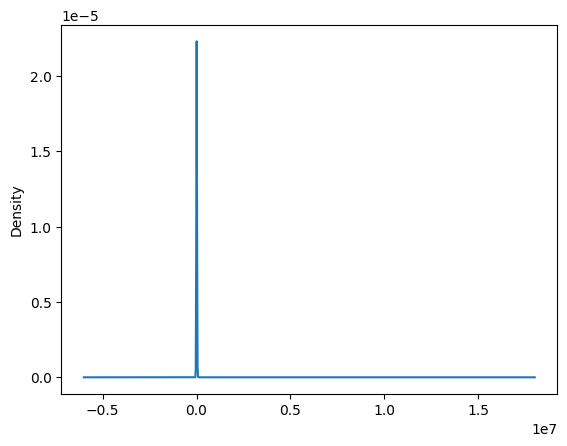

In [34]:
df2["price_per_sqft"].plot(kind="kde")

In [35]:
df2.describe()

,area_type,size,total_sqft,bath,balcony,price,location_Hebbal,location_Kanakpura Road,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_other,price_per_sqft
count,13303.000000,13303.000000,1.330300e+04,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,13303.000000,1.330300e+04
mean,2.290611,2.803728,1.857072e+03,2.689619,1.602872,112.481245,0.013305,0.020522,0.013155,0.012854,0.029843,0.017590,0.013982,0.040517,0.015936,0.799594,8.558351e+03
std,1.144515,1.295022,1.633711e+04,1.339393,0.803455,149.034066,0.114583,0.141782,0.113942,0.112650,0.170160,0.131461,0.117420,0.197176,0.125234,0.400319,1.164368e+05
min,0.000000,1.000000,1.000000e+00,1.000000,0.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.219161e+00
25%,2.000000,2.000000,1.100000e+03,2.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.255319e+03
50%,3.000000,3.000000,1.275000e+03,2.000000,2.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.425532e+03
75%,3.000000,3.000000,1.680000e+03,3.000000,2.000000,120.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,7.317073e+03
max,3.000000,43.000000,1.306800e+06,40.000000,3.000000,3600.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.200000e+07


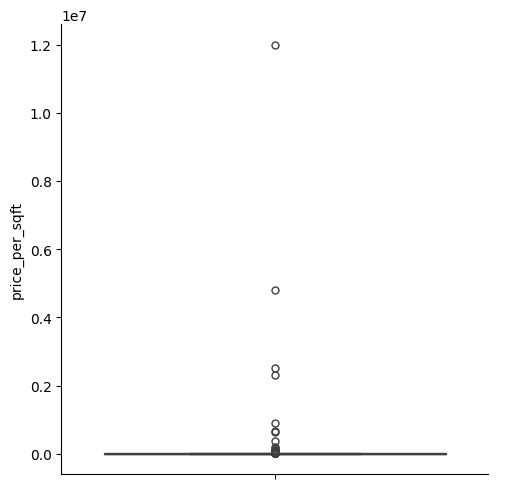

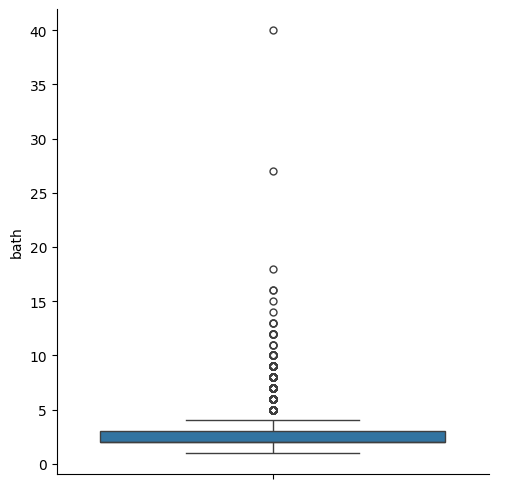

In [36]:
#check for outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(df2,y="price_per_sqft",kind="box")
sns.catplot(df2,y="bath",kind="box")

In [37]:
#IQR
lower_value = df2["price_per_sqft"].quantile(0.25)
upper_value = df2["price_per_sqft"].quantile(0.75)

IQR = upper_value - lower_value

lower_bound = lower_value - (1.5 * IQR)
upper_bound = upper_value + (1.5 * IQR)

df3 = df2.loc[(df2["price_per_sqft"] >= lower_bound) & (df2["price_per_sqft"] <= upper_bound)]

In [38]:
#IQR
lower_value = df2["bath"].quantile(0.25)
upper_value = df2["bath"].quantile(0.75)

IQR = upper_value - lower_value

lower_bound = lower_value - (1.5 * IQR)
upper_bound = upper_value + (1.5 * IQR)
df3=df2.loc[(df2["bath"] >= lower_bound) & (df2["bath"] <= upper_bound)]

In [39]:
#IQR
lower_value = df2["price"].quantile(0.25)
upper_value = df2["price"].quantile(0.75)

IQR = upper_value - lower_value

lower_bound = lower_value - (1.5 * IQR)
upper_bound = upper_value + (1.5 * IQR)
df3=df2.loc[(df2["price"] >= lower_bound) & (df2["price"] <= upper_bound)]

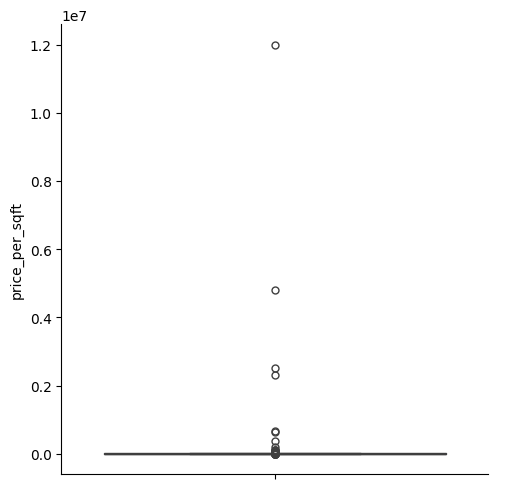

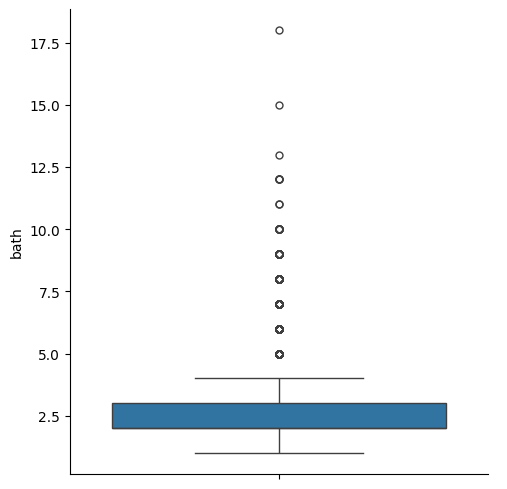

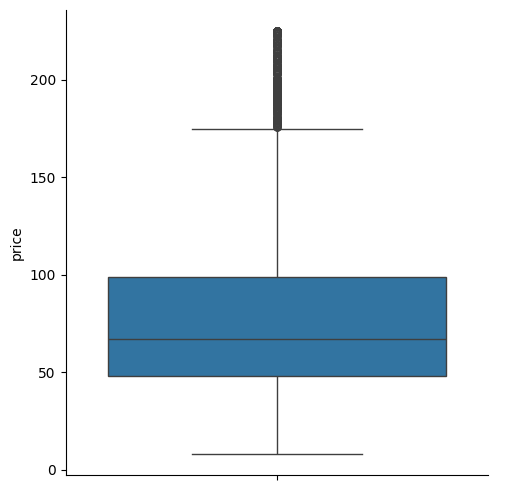

In [40]:
#check for outliers
import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(df3,y="price_per_sqft",kind="box")
sns.catplot(df3,y="bath",kind="box")
sns.catplot(df3,y="price",kind="box")

In [41]:
df3.isnull().sum()

,0
area_type,0
size,0
total_sqft,0
bath,0
balcony,0
price,0
location_Hebbal,0
location_Kanakpura Road,0
location_Marathahalli,0
location_Raja Rajeshwari Nagar,0


In [42]:
from sklearn.preprocessing import StandardScaler
import numpy as np
scalar=StandardScaler()
x=df3.drop(['price'],axis=1)
y=df3['price']
x_scaled=scalar.fit_transform(x)


In [43]:
from sklearn.linear_model import LinearRegression
lr2=LinearRegression()
lr2.fit(x_scaled,y)

LinearRegression()

In [44]:
x_test=x
x_test_scaled=scalar.transform(x_test)
predicted=lr2.predict(x_test_scaled)

In [45]:
from sklearn.metrics import r2_score
r2_score(y,predicted)

0.3627645985498179

In [46]:
df3.values[0].shape

(17,)

In [53]:
# Get the input features from the first row of df3
input_features = df3.drop('price', axis=1).iloc[0].values.reshape(1, -1)

# Scale the input features using the same scaler used for training
input_features_scaled = scalar.transform(input_features)

# Make the prediction using the scaled input features
lr2.predict(input_features_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([64.97470996])

In [54]:
import pickle

In [55]:
pickle.dump(lr2,open('regmodel.pkl','wb'))

In [56]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [58]:
pickled_model.predict(input_features_scaled)

array([64.97470996])